In [44]:
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [45]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [53]:
test_images.shape

(10000, 28, 28)

In [46]:
# train_images: contém imagens de treinamento e rótulos de treinamento
# test_images: verificaremos se nosso modelo também funciona bem
# test_images: os dados de teste são usados ​​para ver o quão bem a máquina pode prever novas respostas com base em seu aprendizado
# test_labels: rótulos de teste

# 0 representa preto
# 255 representa branco
# o intervalo entre 0 e 255 são tons de cinza

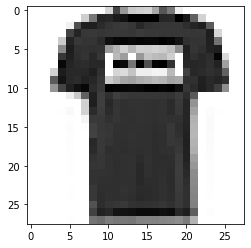

In [54]:
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

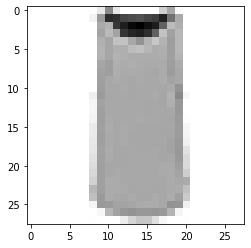

In [48]:
plt.imshow(train_images[2,:,:], cmap = plt.cm.binary)
plt.show()

In [49]:
#cada imagem tem seu valor correspondente:
print(train_labels[1], train_labels[2])

0 0


In [47]:
# Para ter certeza que keras é capaz de ler nossas imagens e usá-las efetivamente, precisamos remodelar as imagens 
# para uma dimensão, em vez de duas, multiplicando 28 por 28, então precisamos também escalar os valores 
# no intervalo [0, 1] primeiro transformando em float32 e dividindo pelo valor mais alto que é 255.
train_images = train_images.reshape((60000, 28*28))
train_images - train_images.astype("float32")/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [48]:
# Outra transformação que precisa ser feita antes de iniciar nosso treinamento é codificar categoricamente os rótulos,
# a maneira mais fácil é usar o keras que fornece um método to_categorical 
# que pode ser usado para codificar dados inteiros de forma one-hot. 
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [49]:
# Nosso modelo será um modelo sequencial que é apropriado para nosso exemplo onde cada camada tem  
# exatamente um tensor de entrada e um tensor de saída. As camadas são os blocos básicos de construção da rede neural.
# Uma camada consiste em uma função data in data out, em nosso exemplo usaremos  
# duas camadas que estão densamente conectadas ou totalmente conectadas, uma camada densa alimenta tudo  
# saída da camada anterior para todos os seus neurônios cada neurônio fornece uma saída para a próxima camada  

In [50]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()

In [12]:
# a primeira camada contém 512 unidades e como função de ativação usamos a função relu ou  
# a unidade linear retificada e finalmente a forma de entrada de nossas imagens. 
model.add(layers.Dense(512, activation="relu", input_shape = (28*28, )))

In [13]:
# A segunda camada contém 10 unidades que representam as classes de 10 dígitos de 0 a 9, pois estamos fazendo uma 
# classificação multiclasse e lidando com probabilidade, então é preferível usar softmax como função de ativação.  
model.add(layers.Dense(10, activation="softmax"))

In [14]:
# na primeira camada temos 401920 parâmetros, que é o número total de pesos e viés, pois nossas camadas estão totalmente conectadas  
# o número total de pesos é 28 vezes 28 entradas vezes 512 unidades mais 512 bias  
# então para a segunda camada temos 5130 parâmetros que é o resultado do número total de pesos
# 512 entradas vezes 10 unidades mais 10 bias.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# O próximo passo é a compilação onde precisamos especificar 
# o otimizador que define como o modelo se atualizará usaremos o algoritmo rmsprop  
# precisamos também especificar a função de perda (loss) que mede o desempenho nos dados de treinamento e  
# usaremos para o nosso caso a entropia cruzada (crossentropy) e então precisamos especificar as métricas para monitorar
# durante o treinamento e o teste, no nosso caso vamos focar apenas na acurácia que é o
# número de imagens rotuladas corretamente de todos os dados

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics= ["accuracy"])

In [16]:
# então deixamos nosso modelo aprender com o dados de treinamento usando o método fit,
# o argumento necessário são as train_images, os train_labels, os número de épocas e o número de tamanho do batch.
# uma época é uma passagem para frente e uma passagem para trás de todas as imagens de treinamento, no nosso caso faremos 5 vezes
# e o tamanho do lote é o número dos exemplos de treinamento em um caminho para frente e para trás,
# quanto maior o tamanho do batch, mais memória e espaço necessário, então decidimos prosseguir com um lote de 128
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 5.5201 - accuracy: 0.8998
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.7241 - accuracy: 0.9543
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4745 - accuracy: 0.9663
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3549 - accuracy: 0.9733
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2971 - accuracy: 0.9769


In [17]:
# Então, vamos verificar agora se nosso modelo executa também bem no test_images.
# Os dados de teste são usados para ver o quão bem a máquina pode prever 
# novas respostas com base em seu treinamento, usando o método de avaliação, podemos obter o loss e a acurácia
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss:", test_loss, "\ntest_acc:", test_acc)
print(f"Essa acurácia significa que o modelo é capaz de classificar corretamente {round(test_acc*100, 1)}%  das imagens")

313/313 [==============================] - 2s 5ms/step - loss: 1.8589 - accuracy: 0.9503
test_loss: 1.8588980436325073 
test_acc: 0.9502999782562256
Essa acurácia significa que o modelo é capaz de classificar corretamente 95.0%  das imagens


### Rede neural convolucional

In [17]:
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [18]:
# Diferença entre camada densamente conectada e camada convolucional:
# as camadas densas só podem aprender com os padrões globais de todos os pixels, mas o  
# camada convolucional pode aprender com os padrões locais, por exemplo, ele pode olhar para a forma  
# das bordas para as linhas verticais e/ou horizontais e então ele pode reconhecê-lo em qualquer lugar  

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
# nosso modelo é um modelo sequencial que é apropriado para nosso exemplo onde cada camada  
# tem exatamente uma resposta de entrada e uma resposta de saída
model_conv = models.Sequential()

In [21]:
# as camadas conv consistem em um conjunto de filtros e  
# cada filtro pode detectar um padrão específico em nosso exemplo usaremos o filtro 3x3 na primeira camada  
# usaremos 32 filtros diferentes de 3x3 e a saída será 26 por 26 pixels e não 28 por 28 devido ao efeito da borda
model_conv.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))

In [22]:
# então usamos o método de agrupamento máximo para  
# para reduzir o tamanho de nossa entrada e também porque os pixels vizinhos nas imagens tendem a ter valores semelhantes
# O max pooling, que é uma operação máxima simples que seleciona o valor máximo de um bloco de tensor.
# No nosso exemplo, aplicaremos o pooling máximo 2 por 2, o que significa selecionar o  
# valor máximo de cada bloco de 2 por 2 então a saída será 13 por 13 que é a metade da nossa entrada 26 por 26 
model_conv.add(layers.MaxPooling2D((2,2)))

In [23]:
# então usamos a segunda camada conv e desta vez usaremos 64 filtros diferentes e a saída será 11 por 11
model_conv.add(layers.Conv2D(64,(3,3), activation='relu'))
# novamente usaremos o pooling máximo 2x2 e a saída será 5x5  
model_conv.add(layers.MaxPooling2D((2,2)))

In [24]:
# e para a última camada de conv, usaremos 64 filtros
model_conv.add(layers.Conv2D(64,(3,3), activation='relu'))


In [25]:
# para usar nosso primeiro modelo de arquitetura com duas camadas densas, precisamos nivelar a saída três por três vezes 64
model_conv.add(layers.Flatten())

In [26]:
# finalmente, pode-se usar a mesma arquitetura do nosso primeiro modelo com duas camadas densas,
# a primeira camada contém 64 unidades e a segunda contém 10 unidades que representam as 10 classes de dígitos de 0 a 9.
model_conv.add(layers.Dense(64,activation = 'relu'))
model_conv.add(layers.Dense(10, activation= 'softmax'))

In [27]:
model_conv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [28]:
# o próximo passo é a fase de compilação onde precisamos especificar o otimizador  
# que define como o modelo se atualizará, usaremos o algoritmo rmsprop para a função loss,  
# que mede o desempenho nos dados de treinamento e usaremos a crossentropy 
# e as métricas para monitorar durante o treinamento e o teste 
# neste caso, focaremos apenas na acurácia, que é o número de imagens rotuladas corretamente  
model_conv.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
# finalmente, deixamos nosso modelo aprender com os dados de treinamento usando o método fit. 
# Os argumentos necessários são as imagens do treino, os rótulos co treino, o número de épocas e o número do tamanho do lote.  
# Uma época é uma passagem para frente e uma passagem para trás de todas as imagens de treinamento, em nosso caso,
# faremos 5 vezes. O tamanho do batch é o número de exemplos de treinamento em uma passagem para frente e para trás quanto maior  
# quanto maior for o tamanho do lote, mais espaço de memória será necessário, portanto, em nosso exemplo, selecionaremos um lote de 64.
model_conv.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 0.1936 - accuracy: 0.9400
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0491 - accuracy: 0.9845
Epoch 3/5
938/938 [==============================] - 35s 38ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0249 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0211 - accuracy: 0.9936


In [30]:
# vamos verificar agora se nosso novo modelo também funciona bem nas imagens de teste.
# Os dados de teste são usados para ver o quão bem a máquina pode prever novas respostas com base em seu treinamento

In [31]:
test_loss, test_acc = model_conv.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0364 - accuracy: 0.9898


In [32]:
# Alcançamos 99% de precisão adicionando a camada conv

In [33]:
print("test_loss:", test_loss, "\ntest_acc:", test_acc)
print(f"Essa acurácia significa que o modelo usando a camada conv é capaz de classificar corretamente {round(test_acc*100, 1)}%  das imagens")

test_loss: 0.03636791929602623 
test_acc: 0.989799976348877
Essa acurácia significa que o modelo usando a camada conv é capaz de classificar corretamente 99.0%  das imagens


In [34]:
# In Keras, to add a convolutional layer, you write model.add(Conv2D(filters=48,kernel_size=5,strides=1,padding='same',activation='relu'))
# What do all these terms mean?

# filters is the number of desired feature maps.

# kernel_size is the size of the convolution kernel. A single number 5 means a 5x5 convolution.

# strides the new layer maps will have a size equal to the previous layer maps divided by strides. Leaving this blank results in strides=1.

# padding is either 'same' or 'valid'. Leaving this blank results in padding='valid'. If padding is 'valid' then the size of the new layer maps is reduced by kernel_size-1. For example, if you perform a 5x5 convolution on a 28x28 image (map) with padding='valid', then the next layer has maps of size 24x24. If padding is 'same', then the size isn't reduced.

# activation is applied during forward propagation. Leaving this blank results in no activation.

## Dataset fashion

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
# def criar_modelo2():
#     model_conv = models.Sequential()
#     model_conv.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape = (28,28,1)))
#     model_conv.add(layers.MaxPooling2D((2,2)))
#     model_conv.add(layers.Conv2D(64,(3,3), activation='relu'))
#     model_conv.add(layers.MaxPooling2D((2,2)))
#     model_conv.add(layers.Conv2D(64,(3,3), activation='relu'))
#     model_conv.add(layers.Flatten())
#     model_conv.add(layers.Dense(64,activation = 'relu'))
#     model_conv.add(layers.Dense(10, activation= 'softmax'))
#     return model_conv

In [57]:
def pre_processamento():
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    train_images = train_images.reshape((60000,28,28,1))
    train_images = train_images.astype('float32')/255

    test_images = test_images.reshape((10000,28,28,1))
    test_images = test_images.astype('float32')/255

    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)

    return train_images, train_labels, test_images, test_labels

In [58]:
# Definir a arquitetura da CNN
def criar_modelo(conv_layers, filters, dense_size):
    model = keras.Sequential()

    # Adicionar camadas de convolução-pooling
    for _ in range(conv_layers):
        model.add(keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(dense_size, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax')) # 10 é o número de classes
    
    # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
model_conv.fit(train_images, train_labels, epochs=5, batch_size = 64)

In [64]:

train_images, train_labels, test_images, test_labels = pre_processamento()

# Definir os valores fixos dos parâmetros
filters = 32
kernel_size = (3, 3)
strides = (1, 1)
padding = 'same'
dense_size = 128

# Testar diferentes quantidades de camadas de convolução-pooling
conv_layers_list = [1, 2, 3]
accuracies_conv_layers = []

for conv_layers in conv_layers_list:
    model = criar_modelo(conv_layers, filters, dense_size)
    kfold = KFold(n_splits=5)
    scores = cross_val_score(model, train_images, train_labels, cv=kfold, scoring='accuracy')
    # accuracies_conv_layers.append(scores.mean())


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x0000015843F29C60>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# # Carregar os dados do Fashion MNIST
# fashion_mnist = keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# # Pré-processamento dos dados
# train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
# test_images = test_images.reshape(-1, 28, 28, 1) / 255.0

train_images, train_labels, test_images, test_labels = pre_processamento()

# Definir os valores fixos dos parâmetros
filters = 32
kernel_size = (3, 3)
strides = (1, 1)
padding = 'same'
dense_size = 128

# Testar diferentes quantidades de camadas de convolução-pooling
conv_layers_list = [1, 2, 3]
accuracies_conv_layers = []

for conv_layers in conv_layers_list:
    model = criar_modelo(conv_layers, filters, dense_size)
    kfold = KFold(n_splits=5)
    scores = cross_val_score(model, train_images, train_labels, cv=kfold, scoring='accuracy')
    accuracies_conv_layers.append(scores.mean())

# Identificar a melhor quantidade de camadas de convolução-pooling
best_conv_layers = conv_layers_list[np.argmax(accuracies_conv_layers)]
best_accuracy_conv_layers = accuracies_conv_layers[np.argmax(accuracies_conv_layers)]

# Imprimir resultados
print("A. Comparação da acurácia para diferentes quantidades de camadas de convolução-pooling:")
for i, conv_layers in enumerate(conv_layers_list):
    print("Quantidade de camadas de convolução-pooling: {}".format(conv_layers))
    print("Acurácia média: {:.4f}".format(accuracies_conv_layers[i]))
    print()
    
print("A melhor quantidade de camadas de convolução-pooling é: {}".format(best_conv_layers))
print("A melhor acurácia média é: {:.4f}".format(best_accuracy_conv_layers))
print()

# Considerando a melhor quantidade de camadas de convolução-pooling, testar diferentes quantidades de filters
filters_list = [16, 32, 64]
accuracies_filters = []

for filters in filters_list:
    model = criar_modelo(best_conv_layers, filters, dense_size)
    kfold = KFold(n_splits=5)
    scores = cross_val_score(model, train_images, train_labels, cv=kfold, scoring='accuracy')
    accuracies_filters.append(scores.mean())

# Identificar a melhor quantidade de filters
best_filters = filters_list[np.argmax(accuracies_filters)]
best_accuracy_filters = accuracies_filters[np.argmax(accuracies_filters)]

# Imprimir resultados
print("B. Comparação da acurácia para diferentes quantidades de filters:")
for i, filters in enumerate(filters_list):
    print("Quantidade de filters na camada de convolução: {}".format(filters))
    print("Acurácia média: {:.4f}".format(accuracies_filters[i]))
    print()
    
print("A melhor quantidade de filters na camada de convolução é: {}".format(best_filters))
print("A melhor acurácia média é: {:.4f}".format(best_accuracy_filters))
print()

# Considerando a melhor quantidade de camadas de convolução-pooling e a melhor quantidade de filters, testar diferentes tamanhos de dense_size
dense_size_list = [64, 128, 256]
accuracies_dense_size = []

for dense_size in dense_size_list:
    model = criar_modelo(best_conv_layers, best_filters, dense_size)
    kfold = KFold(n_splits=5)
    scores = cross_val_score(model, train_images, train_labels, cv=kfold, scoring='accuracy')
    accuracies_dense_size.append(scores.mean())

# Identificar o melhor tamanho da camada densa
best_dense_size = dense_size_list[np.argmax(accuracies_dense_size)]
best_accuracy_dense_size = accuracies_dense_size[np.argmax(accuracies_dense_size)]

# Imprimir resultados
print("C. Comparação da acurácia para diferentes tamanhos de camada densa:")
for i, dense_size in enumerate(dense_size_list):
    print("Tamanho da camada densa: {}".format(dense_size))
    print("Acurácia média: {:.4f}".format(accuracies_dense_size[i]))
    print()
    
print("O melhor tamanho da camada densa é: {}".format(best_dense_size))
print("A melhor acurácia média é: {:.4f}".format(best_accuracy_dense_size))


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x0000015843F58A90>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [36]:
# Testar diferentes configurações usando cross-validation
parameters = {
    'conv_layers': [1, 2, 3],
    'filters': [16, 32, 64],
    'dense_size': [64, 128, 256]
}

In [37]:
best_accuracy = 0.0
best_parameters = {}

for conv_layers in parameters['conv_layers']:
    for filters in parameters['filters']:
        for dense_size in parameters['dense_size']:
            model = model_conv
            model.fit(train_images, train_labels, epochs=5, verbose=0)

            # Realizar cross-validation com 5 folds
            scores = cross_val_score(model, train_images, train_labels, cv=5, scoring='accuracy')
            mean_accuracy = np.mean(scores)

            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_parameters = {'conv_layers': conv_layers, 'filters': filters, 'dense_size': dense_size}

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros:")
print(best_parameters)
print("Melhor acurácia:")
print(best_accuracy)

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000001584386F1F0>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.